In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.simplefilter("ignore")

In [2]:
# Calling Dataset
file_path = r"C:\Users\tiles\Downloads\Final Data on Death of Childrens under age 5.csv"
df = pd.read_csv(file_path)
df.head()

,Entity,Code,Year,GDP (constant 2015 US$) Billion,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),...,Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,AFG,1990,0.0,48,105,1779,718,431,8649,...,7112,2455,3968,131,802,808,10,776,21,123
1,Afghanistan,AFG,1991,0.0,55,130,1822,741,439,8669,...,7574,2385,4650,129,781,800,12,748,41,132
2,Afghanistan,AFG,1992,0.0,68,155,2069,836,486,8539,...,8614,2370,5833,137,821,863,13,777,51,180
3,Afghanistan,AFG,1993,0.0,78,178,2427,970,549,8949,...,9458,2659,7800,155,923,979,16,872,24,239
4,Afghanistan,AFG,1994,0.0,83,194,2649,1063,589,10642,...,9823,3187,7894,170,1015,1064,19,961,52,259


In [3]:
# Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 33 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Entity                                                                                                 6840 non-null   object 
 1   Code                                                                                                   6150 non-null   object 
 2   Year                                                                                                   6840 non-null   int64  
 3   GDP (constant 2015 US$) Billion                                                                        6840 non-null   float64
 4   Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)           

In [4]:
# Checking Null Values
df.isnull().sum()

Entity                                                                                                     0
Code                                                                                                     690
Year                                                                                                       0
GDP (constant 2015 US$) Billion                                                                            0
Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                      0
Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                                        0
Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)                                      0
Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)                                               0
Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)                                                     0
Deaths - Measles - 

In [5]:
# Checking Row names with Missing Values
missing_code_entities_unique = df.loc[df['Code'].isnull(), 'Entity'].unique()
missing_code_entities_unique

array(['African Region (WHO)', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'Latin America & Caribbean (WB)',
       'Middle East & North Africa (WB)', 'North America (WB)',
       'Northern Ireland', 'OECD Countries',
       'Region of the Americas (WHO)', 'Scotland', 'South Asia (WB)',
       'South-East Asia Region (WHO)', 'Sub-Saharan Africa (WB)', 'Wales',
       'Western Pacific Region (WHO)', 'World Bank High Income',
       'World Bank Low Income', 'World Bank Lower Middle Income',
       'World Bank Upper Middle Income'], dtype=object)

In [6]:
# Removing all the NA values
df = df.dropna()

In [7]:
# Dropping world data
indices_to_drop = df[df['Entity'] == 'World'].index
df = df.drop(indices_to_drop)

In [8]:
df

,Entity,Code,Year,GDP (constant 2015 US$) Billion,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),...,Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,AFG,1990,0.000000,48,105,1779,718,431,8649,...,7112,2455,3968,131,802,808,10,776,21,123
1,Afghanistan,AFG,1991,0.000000,55,130,1822,741,439,8669,...,7574,2385,4650,129,781,800,12,748,41,132
2,Afghanistan,AFG,1992,0.000000,68,155,2069,836,486,8539,...,8614,2370,5833,137,821,863,13,777,51,180
3,Afghanistan,AFG,1993,0.000000,78,178,2427,970,549,8949,...,9458,2659,7800,155,923,979,16,872,24,239
4,Afghanistan,AFG,1994,0.000000,83,194,2649,1063,589,10642,...,9823,3187,7894,170,1015,1064,19,961,52,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,19.963120,106,31,1733,17,56,615,...,2269,518,1345,114,115,799,2178,126,1475,399
6836,Zimbabwe,ZWE,2016,20.142980,112,32,1771,18,58,369,...,2249,559,1286,119,120,787,1827,133,1219,398
6837,Zimbabwe,ZWE,2017,20.964866,111,32,1714,17,58,261,...,2245,544,1248,117,119,745,1658,133,1249,394
6838,Zimbabwe,ZWE,2018,22.015179,109,31,1639,16,58,340,...,2203,568,1136,114,115,693,1458,129,1213,397


In [9]:
# Fiiling up missing valoues in the GDP column through mean of the same country
gdp_columns = ['GDP (constant 2015 US$) Billion']
df[gdp_columns] = df[gdp_columns].replace(0, np.nan)
country_means = df.groupby('Entity')[gdp_columns].transform('mean')
df[gdp_columns] = df[gdp_columns].fillna(country_means)

In [10]:
# Checking for Null Values
df.isnull().sum()

Entity                                                                                                     0
Code                                                                                                       0
Year                                                                                                       0
GDP (constant 2015 US$) Billion                                                                          150
Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                      0
Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                                        0
Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)                                      0
Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)                                               0
Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)                                                     0
Deaths - Measles - 

In [11]:
# Dropping
df = df.dropna()

In [12]:
# Checking the extent of the data and columns
df.describe()

,Year,GDP (constant 2015 US$) Billion,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number),...,Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
count,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.00000,5970.000000,5970.000000,...,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000
mean,2004.500000,283.746473,237.289950,80.962312,1324.555444,164.370352,302.852931,1854.58861,258.905863,55.337688,...,2429.856114,824.761474,5336.181072,113.431826,358.407538,625.514238,725.332328,478.291290,2721.425293,458.975377
std,8.656166,1259.963444,1642.343329,307.091735,6970.007725,1636.694653,1218.826497,8523.13215,949.772045,241.682038,...,14457.618126,3673.850109,22890.636578,362.940245,1259.302136,2530.418032,2665.159567,2815.243211,12314.645379,1492.642197
min,1990.000000,0.021562,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,4.373719,0.000000,1.000000,1.000000,0.000000,7.000000,0.00000,2.000000,0.000000,...,17.000000,0.000000,3.000000,2.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,2004.500000,18.464653,1.000000,7.000000,10.000000,1.000000,32.000000,1.00000,16.000000,3.000000,...,148.000000,12.000000,62.000000,11.000000,27.000000,6.000000,5.000000,21.000000,0.000000,7.000000
75%,2012.000000,115.846902,24.000000,39.750000,452.750000,18.000000,182.000000,304.75000,189.000000,33.000000,...,980.500000,336.750000,2211.250000,100.000000,209.000000,181.000000,141.750000,193.750000,78.750000,183.000000
max,2019.000000,19928.975000,29706.000000,6193.000000,190524.000000,28230.000000,25048.000000,140689.00000,17666.000000,4206.000000,...,222306.000000,68278.000000,370585.000000,5579.000000,23997.000000,46353.000000,26915.000000,61123.000000,175925.000000,19235.000000


In [13]:
# Dividing the GDP data into 4 class according to Quartile Method
df['GDP (constant 2015 US$) Billion'] = df['GDP (constant 2015 US$) Billion'].replace(0, pd.NA)
df['GDP_Class'] = pd.qcut(df['GDP (constant 2015 US$) Billion'], 4, labels=[4, 3, 2, 1])
df

,Entity,Code,Year,GDP (constant 2015 US$) Billion,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),...,Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number),GDP_Class
0,Afghanistan,AFG,1990,14.557656,48,105,1779,718,431,8649,...,2455,3968,131,802,808,10,776,21,123,3
1,Afghanistan,AFG,1991,14.557656,55,130,1822,741,439,8669,...,2385,4650,129,781,800,12,748,41,132,3
2,Afghanistan,AFG,1992,14.557656,68,155,2069,836,486,8539,...,2370,5833,137,821,863,13,777,51,180,3
3,Afghanistan,AFG,1993,14.557656,78,178,2427,970,549,8949,...,2659,7800,155,923,979,16,872,24,239,3
4,Afghanistan,AFG,1994,14.557656,83,194,2649,1063,589,10642,...,3187,7894,170,1015,1064,19,961,52,259,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,19.963120,106,31,1733,17,56,615,...,518,1345,114,115,799,2178,126,1475,399,2
6836,Zimbabwe,ZWE,2016,20.142980,112,32,1771,18,58,369,...,559,1286,119,120,787,1827,133,1219,398,2
6837,Zimbabwe,ZWE,2017,20.964866,111,32,1714,17,58,261,...,544,1248,117,119,745,1658,133,1249,394,2
6838,Zimbabwe,ZWE,2018,22.015179,109,31,1639,16,58,340,...,568,1136,114,115,693,1458,129,1213,397,2


In [14]:
# Renaming the Column Names
rename_dict = {
    'Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)': 'INTS',
    'Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)': 'Violence',
    'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)': 'Nutrition',
    'Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)': 'Hepatitis',
    'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)': 'Neoplasms',
    'Deaths - Measles - Sex: Both - Age: Under 5 (Number)': 'Measles',
    'Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number)': 'Digestive',
    'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number)': 'Cirrhosis',
    'Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number)': 'Kidney',
    'Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number)': 'Cardiovascular',
    'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)': 'Congenital',
    'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)': 'Respiratory',
    'Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number)': 'Preterm',
    'Deaths - Environmental heat and cold exposure - Sex: Both - Age: Under 5 (Number)': 'Heat_Cold',
    'Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number)': 'Sepsis',
    'Deaths - Exposure to forces of nature - Sex: Both - Age: Under 5 (Number)': 'Nature',
    'Deaths - Diabetes mellitus - Sex: Both - Age: Under 5 (Number)': 'Diabetes',
    'Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number)': 'Encephalopathy',
    'Deaths - Meningitis - Sex: Both - Age: Under 5 (Number)': 'Meningitis',
    'Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number)': 'Other_Neonatal',
    'Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number)': 'Whooping_Cough',
    'Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)': 'Diarrheal',
    'Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)': 'Fire_Heat',
    'Deaths - Road injuries - Sex: Both - Age: Under 5 (Number)': 'Road',
    'Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number)': 'Tuberculosis',
    'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)': 'HIV_AIDS',
    'Deaths - Drowning - Sex: Both - Age: Under 5 (Number)': 'Drowning',
    'Deaths - Malaria - Sex: Both - Age: Under 5 (Number)': 'Malaria',
    'Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)': 'Syphilis'
}

df = df.rename(columns=rename_dict)
print(df.columns)

Index(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$) Billion', 'INTS',
       'Violence', 'Nutrition', 'Hepatitis', 'Neoplasms', 'Measles',
       'Digestive', 'Cirrhosis', 'Kidney', 'Cardiovascular', 'Congenital',
       'Respiratory', 'Preterm', 'Heat_Cold', 'Sepsis', 'Nature', 'Diabetes',
       'Encephalopathy', 'Meningitis', 'Other_Neonatal', 'Whooping_Cough',
       'Diarrheal', 'Fire_Heat', 'Road', 'Tuberculosis', 'HIV_AIDS',
       'Drowning', 'Malaria', 'Syphilis', 'GDP_Class'],
      dtype='object')


### Graphs

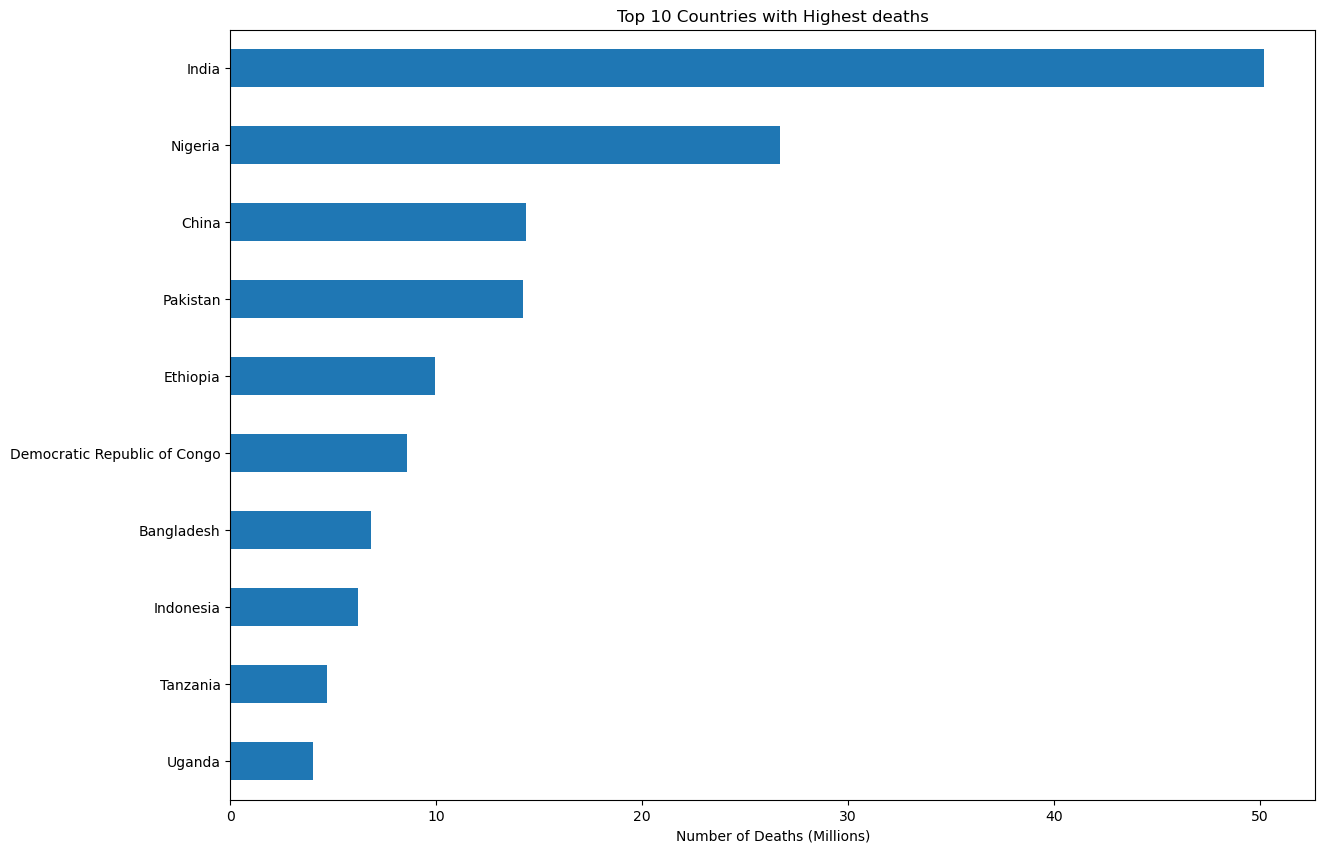

In [15]:
#### Top 10 Countries with Highest Death
data = df[['Entity', 'INTS', 'Violence', 'Nutrition', 'Hepatitis', 'Neoplasms', 
           'Measles', 'Digestive', 'Cirrhosis', 'Kidney', 'Cardiovascular', 
           'Congenital', 'Respiratory', 'Preterm', 'Heat_Cold', 'Sepsis', 
           'Nature', 'Diabetes', 'Encephalopathy', 'Meningitis', 
           'Other_Neonatal', 'Whooping_Cough', 'Diarrheal', 'Fire_Heat', 
           'Road', 'Tuberculosis', 'HIV_AIDS', 'Drowning', 'Malaria', 
           'Syphilis']].groupby('Entity').sum().sum(axis=1) / 1e6

top_10_countries = data.nlargest(10)

top_10_countries = top_10_countries.iloc[::-1]

top_10_countries.plot(kind='barh', figsize=(14, 10), title='Top 10 Countries with Highest deaths')
plt.xlabel('Number of Deaths (Millions)')
plt.ylabel('')
plt.ticklabel_format(style='plain', axis='x')  
plt.show()

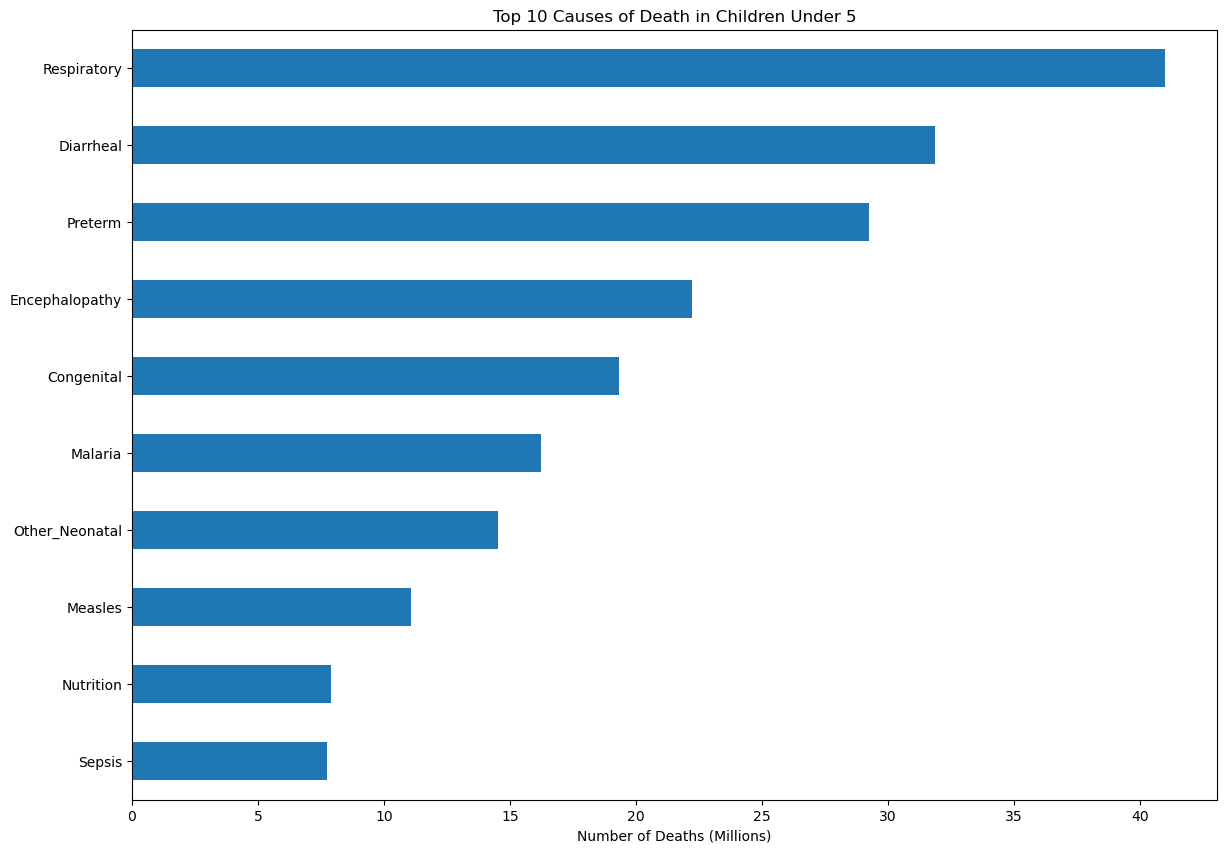

In [16]:
# Top 10 Causes Deaths
data = df.drop(columns=['Entity', 'Code', 'Year', 'GDP (constant 2015 US$) Billion', 'GDP_Class']).sum() / 1000000
sorted_data = data.sort_values(ascending=True)  
top_10_data = sorted_data.tail(10)  
ax = top_10_data.plot(kind='barh', figsize=(14, 10), title='Top 10 Causes of Death in Children Under 5')
plt.xlabel('Number of Deaths (Millions)')
plt.ticklabel_format(style='plain', axis='x') 
ax.set_xticklabels(['{:.0f}'.format(x) for x in ax.get_xticks()])
plt.show()


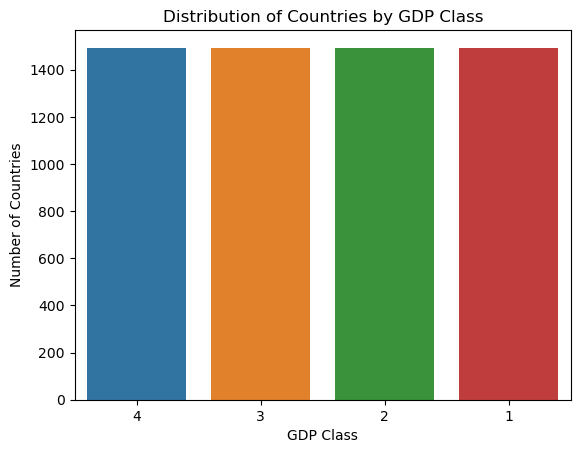

In [17]:
# Distribution after Classes dfeined after using 
sns.countplot(x='GDP_Class', data=df)
plt.title('Distribution of Countries by GDP Class')
plt.xlabel('GDP Class')
plt.ylabel('Number of Countries')
plt.show()

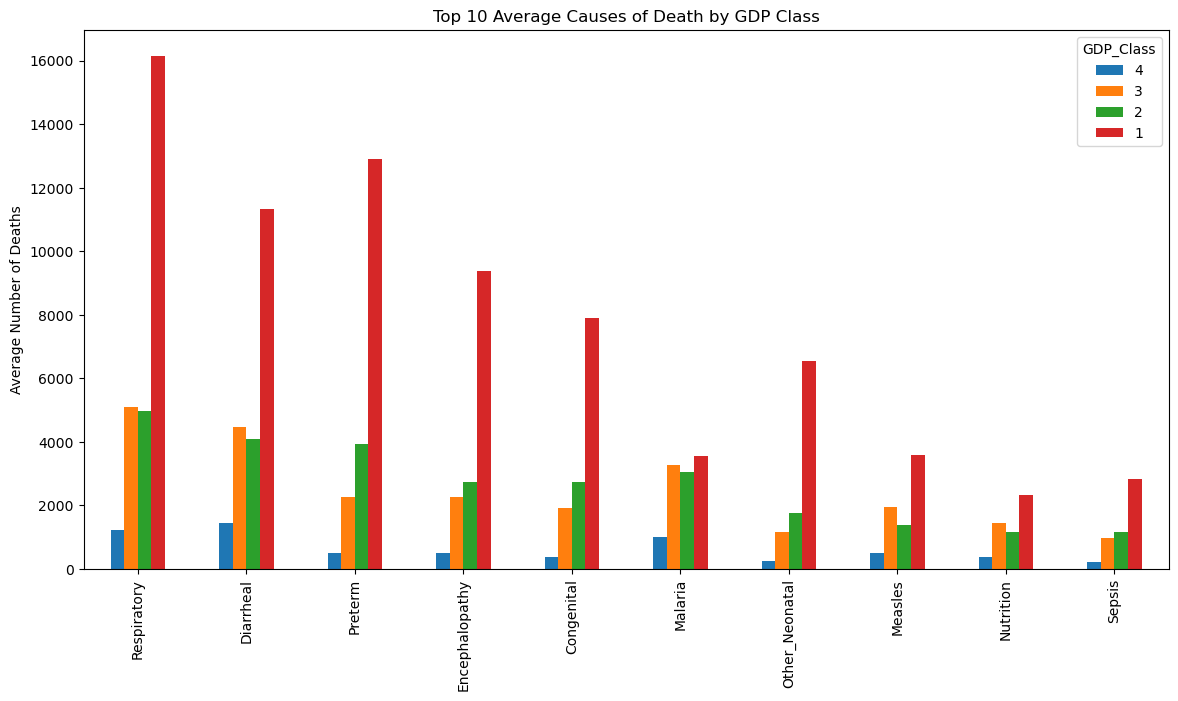

In [18]:
cause_columns = df.columns.drop(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$) Billion', 'GDP_Class'])

gdp_cause_means = df.groupby('GDP_Class')[cause_columns].mean()
mean_deaths_by_cause = gdp_cause_means.mean()
top_10_causes = mean_deaths_by_cause.sort_values(ascending=False).head(10).index

gdp_cause_means[top_10_causes].T.plot(kind='bar', figsize=(14, 7), title='Top 10 Average Causes of Death by GDP Class')
plt.ylabel('Average Number of Deaths')
plt.show()


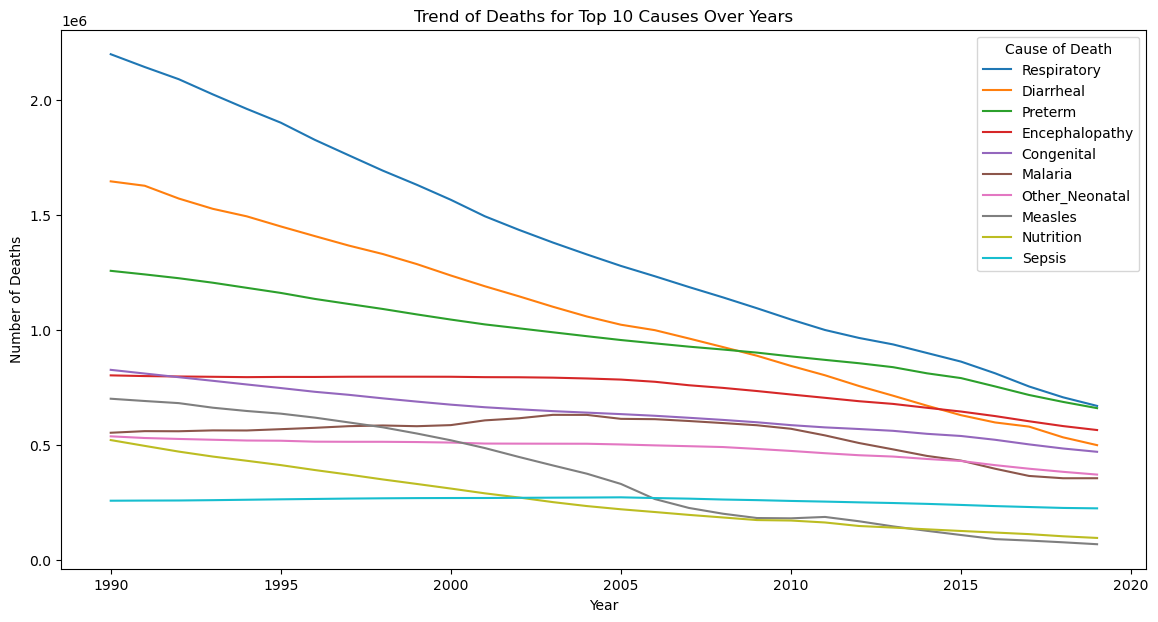

In [19]:
total_deaths_by_cause = df[cause_columns].sum()
top_10_causes = total_deaths_by_cause.sort_values(ascending=False).head(10).index
top_10_causes_df = df[['Year'] + list(top_10_causes)]
trend_data = top_10_causes_df.groupby('Year')[top_10_causes].sum().reset_index()

plt.figure(figsize=(14, 7))
for cause in top_10_causes:
    sns.lineplot(x='Year', y=cause, data=trend_data, label=cause)

plt.title('Trend of Deaths for Top 10 Causes Over Years')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.legend(title='Cause of Death')
plt.show()

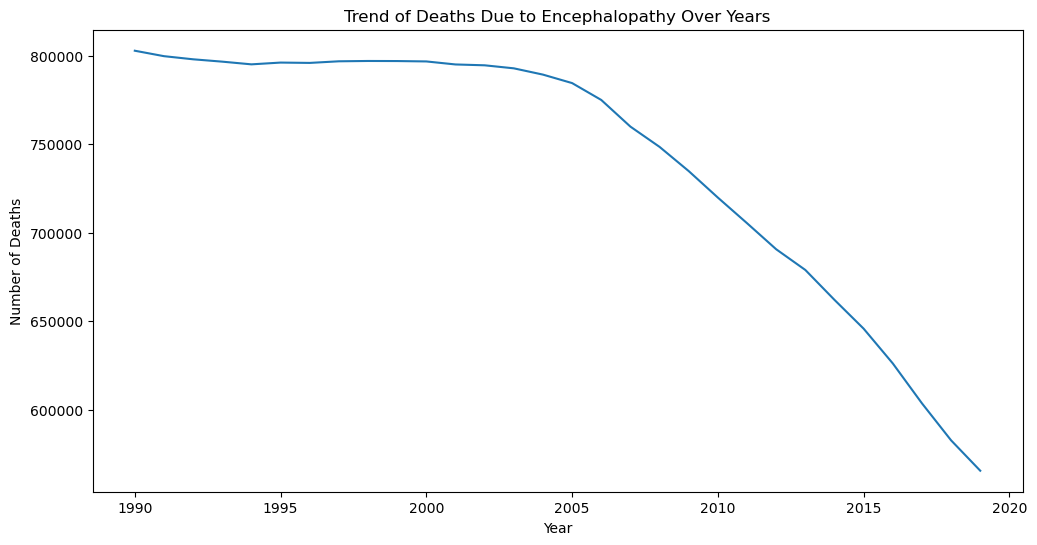

In [20]:
cause = 'Encephalopathy'
trend_data = df.groupby('Year')[cause].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y=cause, data=trend_data)
plt.title(f'Trend of Deaths Due to {cause} Over Years')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.show()

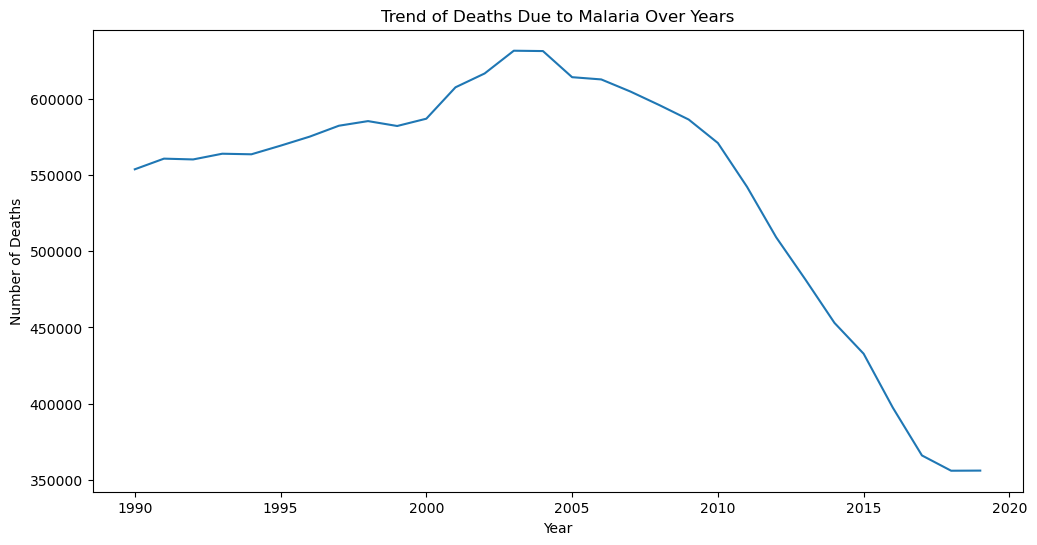

In [21]:
cause = 'Malaria'
trend_data = df.groupby('Year')[cause].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y=cause, data=trend_data)
plt.title(f'Trend of Deaths Due to {cause} Over Years')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.show()

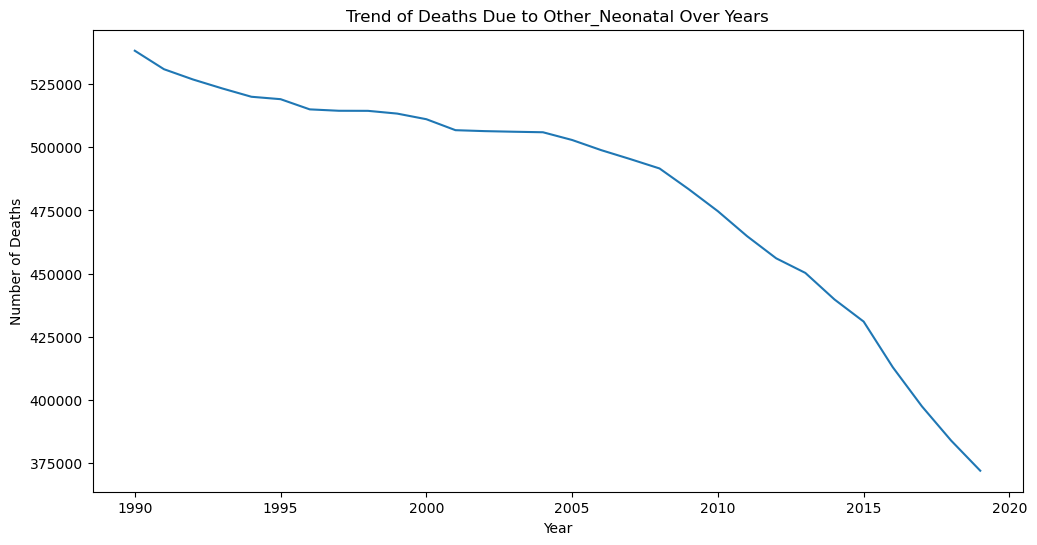

In [22]:
cause = 'Other_Neonatal'
trend_data = df.groupby('Year')[cause].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y=cause, data=trend_data)
plt.title(f'Trend of Deaths Due to {cause} Over Years')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.show()

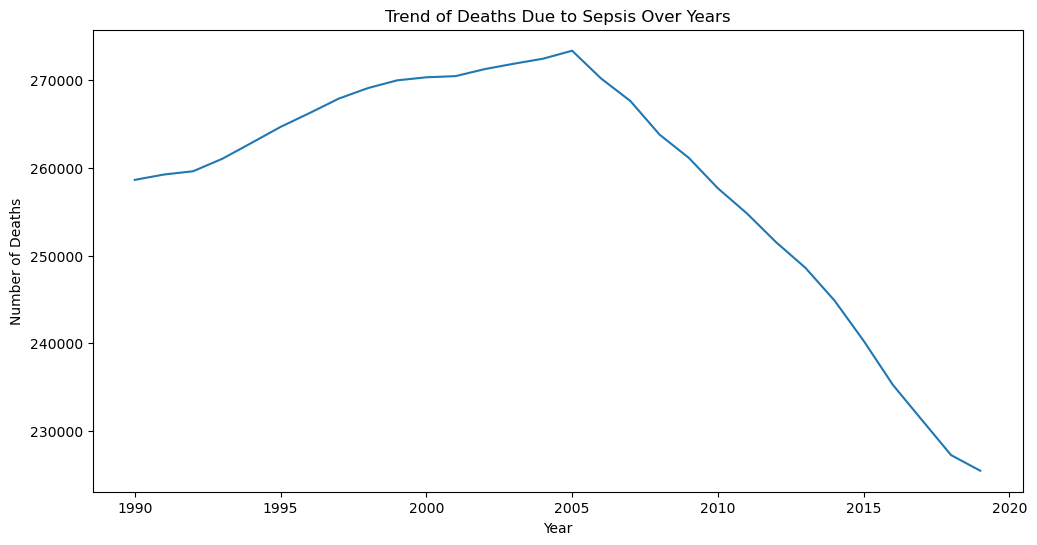

In [23]:
cause = 'Sepsis'
trend_data = df.groupby('Year')[cause].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y=cause, data=trend_data)
plt.title(f'Trend of Deaths Due to {cause} Over Years')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.show()

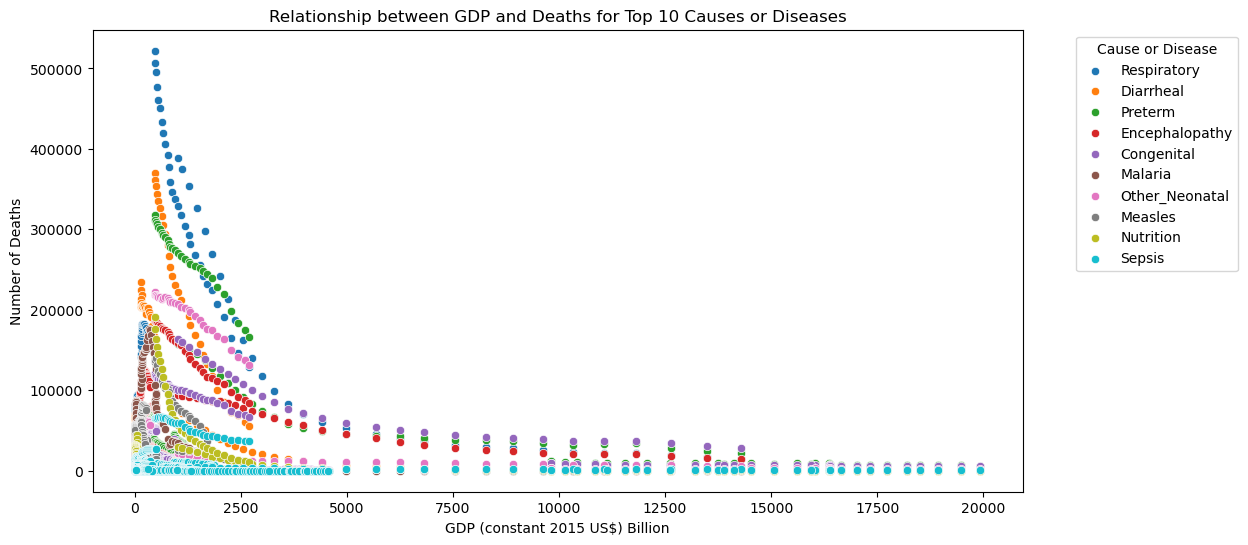

In [24]:
total_deaths_cause = df[cause_columns].sum()
top_10_causes = total_deaths_cause.sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 6))
for cause in top_10_causes:
    sns.scatterplot(x='GDP (constant 2015 US$) Billion', y=cause, data=df, label=cause)

plt.title('Relationship between GDP and Deaths for Top 10 Causes or Diseases')
plt.xlabel('GDP (constant 2015 US$) Billion')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause or Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Random Forest Classifier

In [25]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$) Billion', 'GDP_Class'], axis=1)
y = df['GDP_Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

In [26]:
# RF Classifier

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_features': [2, 4, 6]
}

rf = RandomForestClassifier(random_state=123)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best parameters for Random Forest:", grid_search.best_params_)

y_pred_rf = best_rf.predict(X_test)

train_accuracy = best_rf.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", test_accuracy)

train_error = 1 - train_accuracy
print("Train Error:", train_error)

test_error = 1 - test_accuracy
print("Test Error:", test_error)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Best parameters for Random Forest: {'max_features': 2, 'n_estimators': 30}
Train Accuracy: 0.9964106245513281
Test Accuracy: 0.966499162479062
Train Error: 0.003589375448671883
Test Error: 0.03350083752093802

Confusion Matrix:
[[440   5   0   0]
 [  5 412  13   0]
 [  0  13 408  17]
 [  0   0   7 471]]

Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       445
           2       0.96      0.96      0.96       430
           3       0.95      0.93      0.94       438
           4       0.97      0.99      0.98       478

    accuracy                           0.97      1791
   macro avg       0.97      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791

Accuracy: 0.966499162479062


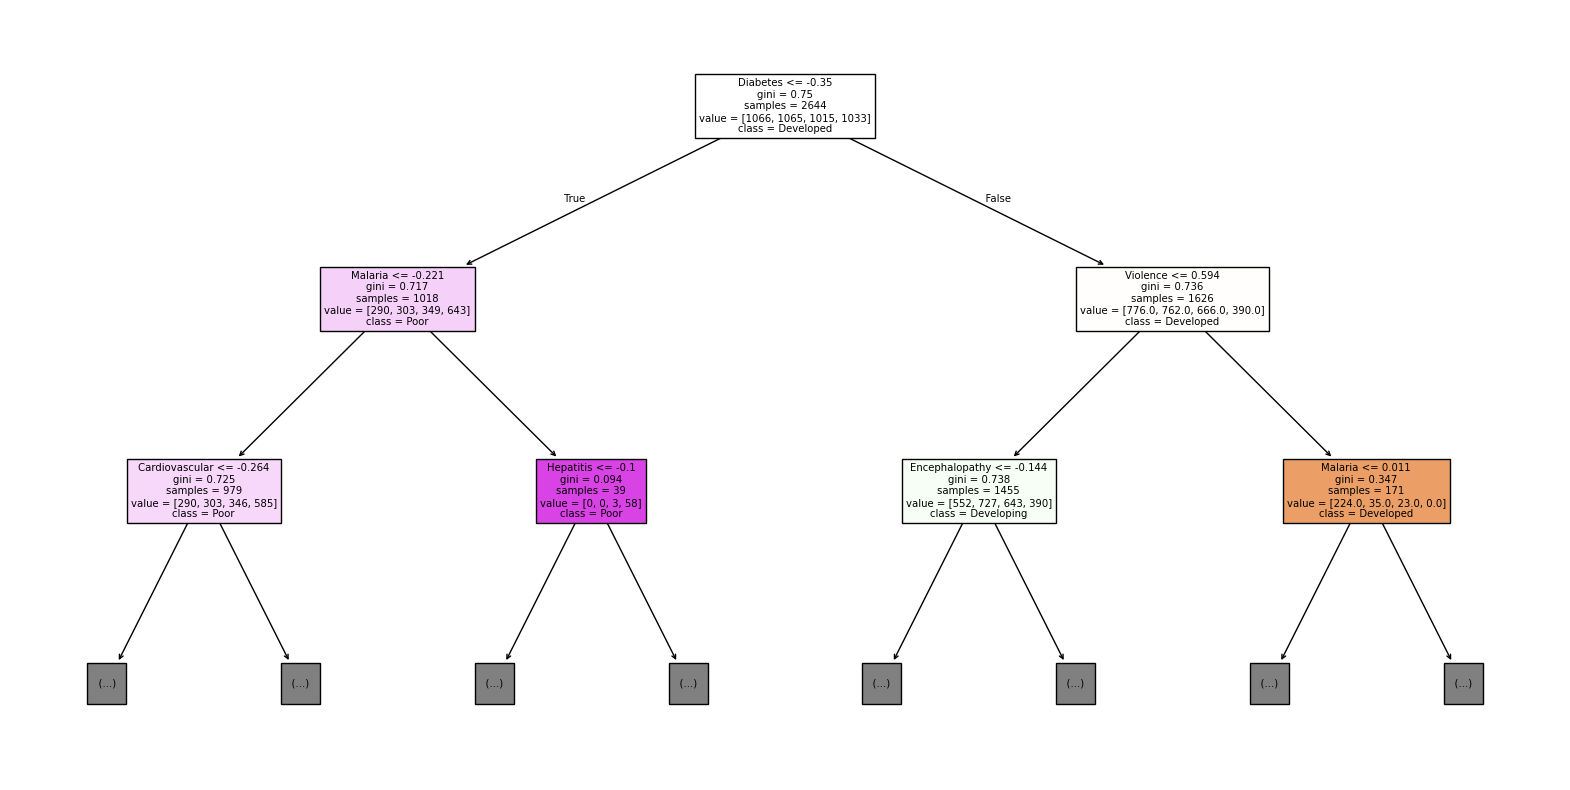

In [48]:
### Tree Generation
feature_names_list = X.columns.tolist()

plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0], feature_names=feature_names_list, class_names=['Developed', 'Developing', 'Under Developed', 'Poor'], filled=True, max_depth=2)
plt.show()

In [28]:
# Variable Importance
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

           Feature  Importance
10      Congenital    0.069775
4        Neoplasms    0.062078
19  Other_Neonatal    0.049724
12         Preterm    0.048874
23            Road    0.048786
11     Respiratory    0.047980
2        Nutrition    0.043319
21       Diarrheal    0.041974
1         Violence    0.040609
14          Sepsis    0.040272
17  Encephalopathy    0.039841
28        Syphilis    0.036030
26        Drowning    0.034981
24    Tuberculosis    0.034558
9   Cardiovascular    0.032886
18      Meningitis    0.032394
8           Kidney    0.032104
20  Whooping_Cough    0.028862
6        Digestive    0.028702
5          Measles    0.027313
7        Cirrhosis    0.026738
25        HIV_AIDS    0.024016
22       Fire_Heat    0.024001
27         Malaria    0.023921
16        Diabetes    0.022629
3        Hepatitis    0.018600
0             INTS    0.015426
13       Heat_Cold    0.014665
15          Nature    0.008940


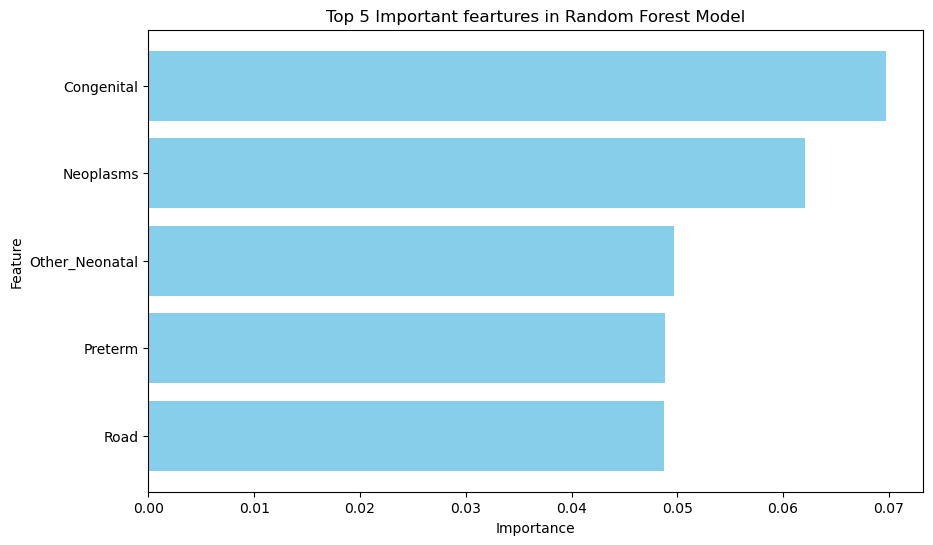

In [29]:
# Top 5 Important Vraiables
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_indices = indices[:5]
top_features = [feature_names_list[i] for i in top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Important feartures in Random Forest Model')
plt.gca().invert_yaxis() 
plt.show()


#### Bagging with DT

In [30]:
base_dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_features': [X_train.shape[1]]  
}

grid_search_bagging_dt = GridSearchCV(estimator=BaggingClassifier(base_dt, random_state=42), 
                                      param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_bagging_dt.fit(X_train, y_train)

best_bagging_dt = grid_search_bagging_dt.best_estimator_
print("Best parameters for Decision Tree Bagging Classifier:", grid_search_bagging_dt.best_params_)

y_pred_bagging_dt_tuned = best_bagging_dt.predict(X_test)

accuracy_bagging_dt_tuned = accuracy_score(y_test, y_pred_bagging_dt_tuned)
print("Accuracy:", accuracy_bagging_dt_tuned)

train_accuracy_bagging_dt = best_bagging_dt.score(X_train, y_train)
print("Train Accuracy:", train_accuracy_bagging_dt)

test_accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt_tuned)
print("Test Accuracy:", test_accuracy_bagging_dt)

train_error_bagging_dt = 1 - train_accuracy_bagging_dt
print("Train Error:", train_error_bagging_dt)

test_error_bagging_dt = 1 - test_accuracy_bagging_dt
print("Test Error:", test_error_bagging_dt)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging_dt_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging_dt_tuned))

accuracy_bagging_dt_tuned = accuracy_score(y_test, y_pred_bagging_dt_tuned)
print("Accuracy:", accuracy_bagging_dt_tuned)

Best parameters for Decision Tree Bagging Classifier: {'max_features': 29, 'n_estimators': 20}
Accuracy: 0.9581239530988275
Train Accuracy: 0.9966499162479062
Test Accuracy: 0.9581239530988275
Train Error: 0.00335008375209378
Test Error: 0.041876046901172526

Confusion Matrix:
[[437   8   0   0]
 [  8 409  13   0]
 [  0  16 403  19]
 [  0   0  11 467]]

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       445
           2       0.94      0.95      0.95       430
           3       0.94      0.92      0.93       438
           4       0.96      0.98      0.97       478

    accuracy                           0.96      1791
   macro avg       0.96      0.96      0.96      1791
weighted avg       0.96      0.96      0.96      1791

Accuracy: 0.9581239530988275


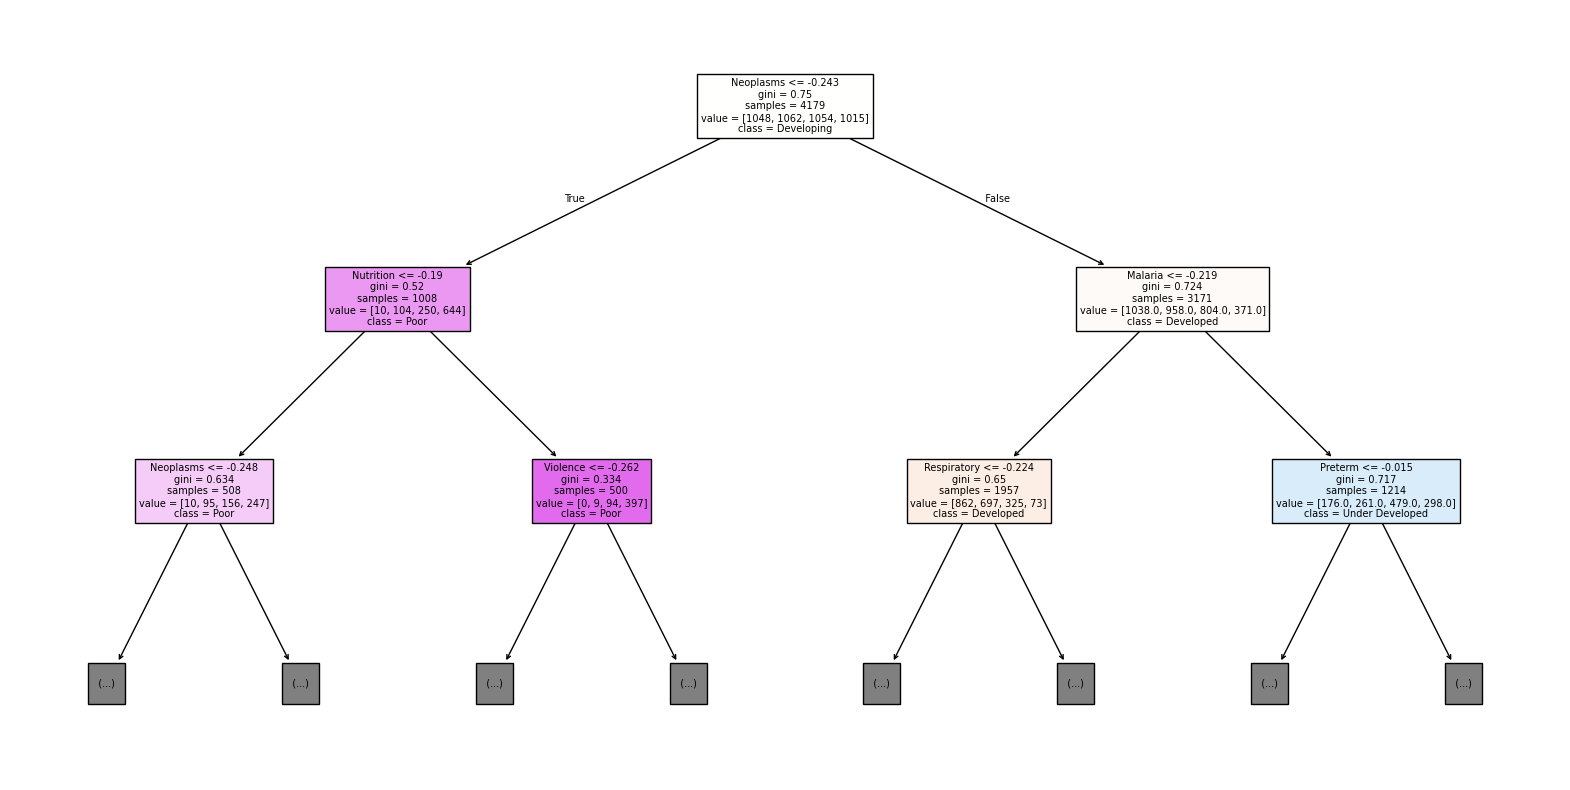

In [31]:
# Tree model for DBagging with Decision Tree Classifier
base_decision_tree = DecisionTreeClassifier(random_state=42)
base_decision_tree.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(base_decision_tree, feature_names=feature_names_list, class_names=['Developed', 'Developing', 'Under Developed', 'Poor'], filled=True, max_depth=2)
plt.show()

In [32]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in best_bagging_dt.estimators_
], axis=0)

feature_importance_df = pd.DataFrame({'Feature': df.drop(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$) Billion', 'GDP_Class'], axis=1).columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
4,Neoplasms,0.192679
12,Preterm,0.078977
10,Congenital,0.072614
2,Nutrition,0.066883
11,Respiratory,0.065775
27,Malaria,0.064986
14,Sepsis,0.040569
23,Road,0.035831
28,Syphilis,0.032055
19,Other_Neonatal,0.031675


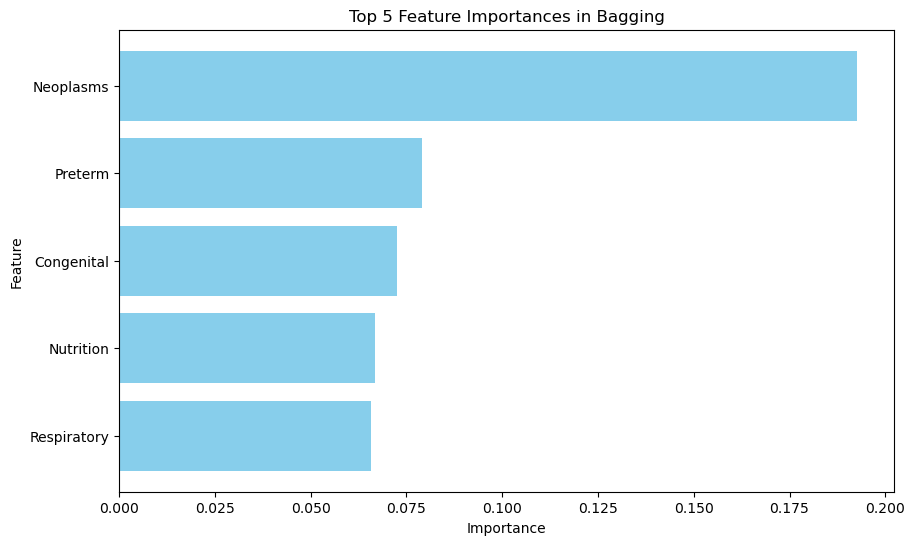

In [33]:
# Top 5 Features
top_features = feature_importance_df.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances in Bagging')
plt.gca().invert_yaxis() 
plt.show()


#### Boosting

In [34]:
boosting_classifier = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2, 5, 10]
}

grid_search_boosting = GridSearchCV(estimator=boosting_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_boosting.fit(X_train, y_train)

best_boosting = grid_search_boosting.best_estimator_
print("Best parameters for Gradient Boosting Classifier:", grid_search_boosting.best_params_)

y_pred_boosting = best_boosting.predict(X_test)

train_accuracy_boosting = best_boosting.score(X_train, y_train)
print("Train Accuracy:", train_accuracy_boosting)

test_accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Test Accuracy:", test_accuracy_boosting)

train_error_boosting = 1 - train_accuracy_boosting
print("Train Error:", train_error_boosting)

test_error_boosting = 1 - test_accuracy_boosting
print("Test Error:", test_error_boosting)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_boosting))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_boosting))

accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print("Accuracy:", accuracy_boosting)


Best parameters for Gradient Boosting Classifier: {'max_depth': 10, 'n_estimators': 30}
Train Accuracy: 0.9968892079444843
Test Accuracy: 0.9642657733109995
Train Error: 0.0031107920555156765
Test Error: 0.0357342266890005

Confusion Matrix:
[[439   6   0   0]
 [  8 411  11   0]
 [  0  13 407  18]
 [  0   0   8 470]]

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       445
           2       0.96      0.96      0.96       430
           3       0.96      0.93      0.94       438
           4       0.96      0.98      0.97       478

    accuracy                           0.96      1791
   macro avg       0.96      0.96      0.96      1791
weighted avg       0.96      0.96      0.96      1791

Accuracy: 0.9642657733109995


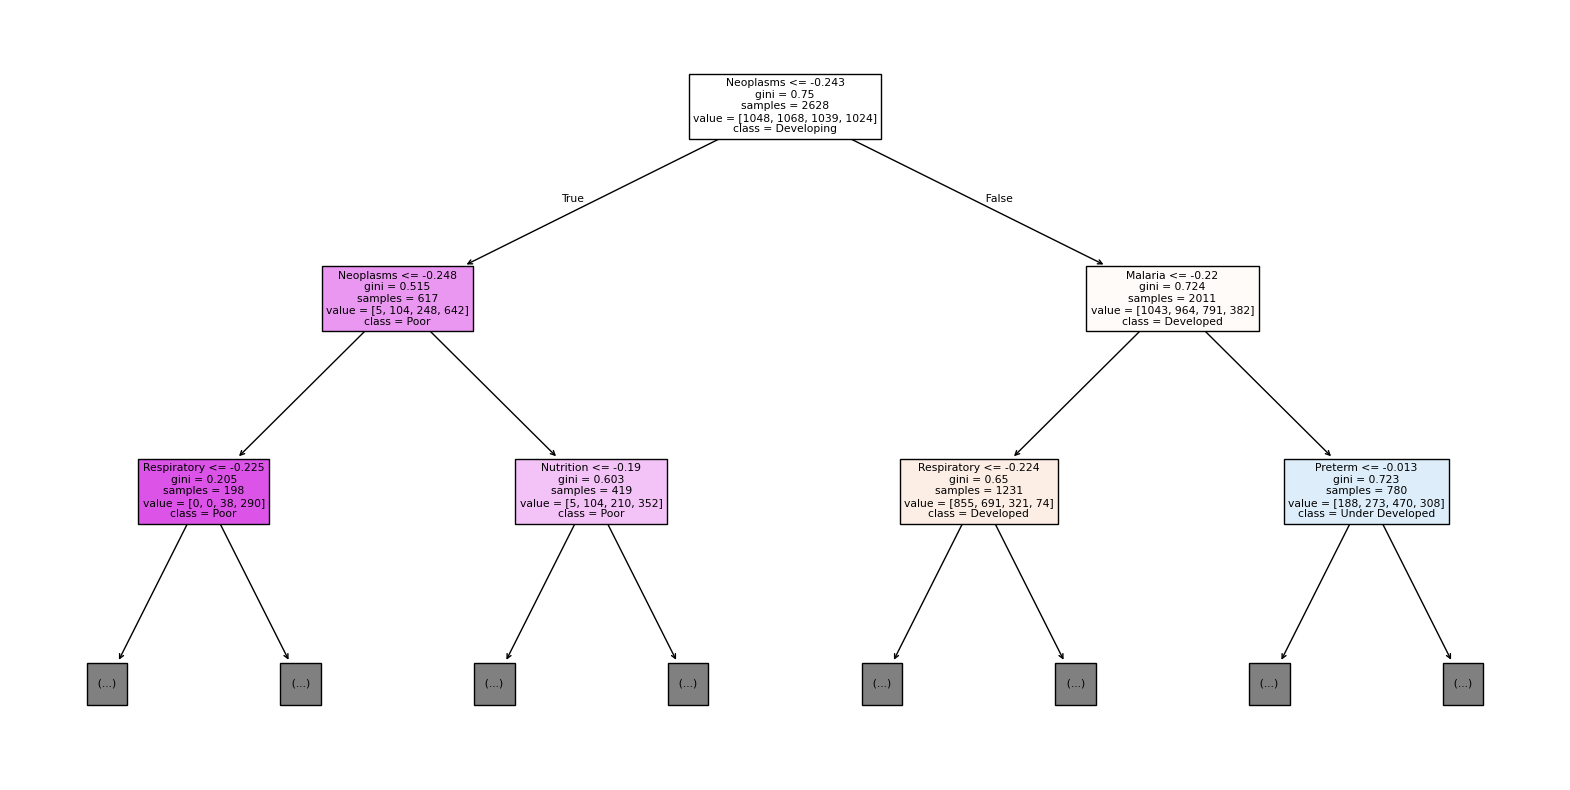

In [35]:
# Tree Model for Bossting with Decision Tree
first_tree = best_bagging_dt.estimators_[0]

plt.figure(figsize=(20, 10))
plt.title("Decision Tree from Bagging Classifier")
plot_tree(first_tree, feature_names=feature_names_list, class_names=['Developed', 'Developing', 'Under Developed', 'Poor'], filled=True, max_depth=2)
plt.show()

In [36]:
# Variable Importance
feature_importance = best_boosting.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = np.array(feature_names_list)[sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

for feature_name, importance in zip(sorted_feature_names, sorted_feature_importance):
    print(f"{feature_name}: {importance}")


Neoplasms: 0.17992199227656835
Preterm: 0.0807519300583025
Respiratory: 0.07206716549280796
Malaria: 0.06630149941899859
Congenital: 0.06471835605125777
Nutrition: 0.06402706915568504
Violence: 0.052260501782867085
Sepsis: 0.04476979246066699
Other_Neonatal: 0.034296961284263676
Encephalopathy: 0.032753561806686676
Diarrheal: 0.02973225869674273
INTS: 0.02712802335708643
Road: 0.0216972537062967
Syphilis: 0.021160910311902193
Tuberculosis: 0.020325554081741724
HIV_AIDS: 0.02022936083941837
Cardiovascular: 0.019345362439555595
Hepatitis: 0.017240474709927348
Kidney: 0.016681640853162948
Drowning: 0.01622021736463195
Whooping_Cough: 0.014907898600452902
Diabetes: 0.013811817775610996
Digestive: 0.01355474901073077
Fire_Heat: 0.013248381794397898
Meningitis: 0.012690036671419063
Measles: 0.011942306048320313
Cirrhosis: 0.00986320598928833
Heat_Cold: 0.008024045176888619
Nature: 0.0003276727843204986


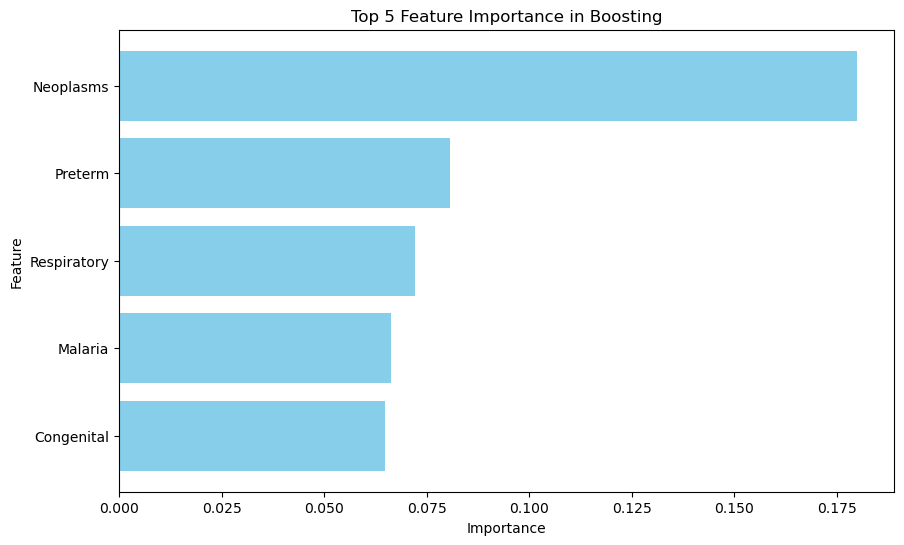

In [37]:
# Top 5 Important Feature in Boosting
feature_importance = best_boosting.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
top_features = 5
plt.figure(figsize=(10, 6))
plt.barh(range(top_features), feature_importance[sorted_indices][:top_features][::-1], align='center', color='skyblue')
plt.yticks(range(top_features), np.array(feature_names_list)[sorted_indices][:top_features][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importance in Boosting')
plt.show()

### Regression Models

#### Random Forest Regressor

In [38]:
X = df[[  'INTS', 'Violence', 'Nutrition', 'Hepatitis', 'Neoplasms',
        'Measles', 'Digestive', 'Cirrhosis', 'Kidney', 'Cardiovascular', 'Congenital', 'Respiratory',
        'Preterm', 'Heat_Cold', 'Sepsis', 'Nature', 'Diabetes', 'Encephalopathy', 'Meningitis',
        'Other_Neonatal', 'Whooping_Cough', 'Diarrheal', 'Fire_Heat', 'Road', 'Tuberculosis', 'HIV_AIDS',
        'Drowning', 'Malaria', 'Syphilis']]

y = df.drop(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$) Billion', 'GDP_Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30],
}

rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)

best_rf_regressor.fit(X_train_scaled, y_train)

y_pred = best_rf_regressor.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


Best hyperparameters: {'max_depth': 10, 'n_estimators': 30}
Mean Squared Error (MSE): 525904.2801559122
Mean Absolute Error (MAE): 138.2279608017326
R-squared: 0.9432340032741553


In [39]:
# Death Number Prediction for 2019
df_2019 = df[df['Year'] == 2019]

X_2019 = df_2019[['GDP (constant 2015 US$) Billion', 'INTS', 'Violence', 'Nutrition', 'Hepatitis', 'Neoplasms',
                  'Measles', 'Digestive', 'Cirrhosis', 'Kidney', 'Cardiovascular', 'Congenital', 'Respiratory',
                  'Preterm', 'Heat_Cold', 'Sepsis', 'Nature', 'Diabetes', 'Encephalopathy', 'Meningitis',
                  'Other_Neonatal', 'Whooping_Cough', 'Diarrheal', 'Fire_Heat', 'Road', 'Tuberculosis', 'HIV_AIDS',
                  'Drowning', 'Malaria', 'Syphilis']]

X_2019_scaled = scaler.transform(X_2019.drop('GDP (constant 2015 US$) Billion', axis=1))
predictions_2019 = best_rf_regressor.predict(X_2019_scaled)
predictions_2019_rounded = predictions_2019.round().astype(int)

for i, disease in enumerate(X_2019.columns[1:]):
    df_2019[disease + '_Predicted_Deaths_2019'] = predictions_2019_rounded[:, i]

df_2019

,Entity,Code,Year,GDP (constant 2015 US$) Billion,INTS,Violence,Nutrition,Hepatitis,Neoplasms,Measles,...,Other_Neonatal_Predicted_Deaths_2019,Whooping_Cough_Predicted_Deaths_2019,Diarrheal_Predicted_Deaths_2019,Fire_Heat_Predicted_Deaths_2019,Road_Predicted_Deaths_2019,Tuberculosis_Predicted_Deaths_2019,HIV_AIDS_Predicted_Deaths_2019,Drowning_Predicted_Deaths_2019,Malaria_Predicted_Deaths_2019,Syphilis_Predicted_Deaths_2019
29,Afghanistan,AFG,2019,21.118474,174,240,925,307,620,1061,...,9945,2834,6248,138,861,522,100,717,73,391
89,Albania,ALB,2019,12.967696,0,1,2,0,18,1,...,33,2,7,3,7,0,1,5,0,3
119,Algeria,DZA,2019,177.355540,8,9,27,10,125,75,...,1795,214,270,64,432,13,27,100,0,75
149,American Samoa,ASM,2019,0.628818,0,0,0,0,0,0,...,3,1,1,0,0,0,0,0,0,1
179,Andorra,AND,2019,3.008968,0,0,0,0,0,0,...,3,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,Vanuatu,VUT,2019,0.864199,0,0,4,0,2,4,...,9,2,6,1,2,0,0,2,2,2
6539,Vietnam,VNM,2019,314.947630,21,18,46,4,270,177,...,677,390,317,63,188,71,99,625,5,140
6779,Yemen,YEM,2019,43.374423,56,35,542,53,248,366,...,6041,933,5485,163,1153,87,78,261,67,387
6809,Zambia,ZMB,2019,24.089862,45,71,986,14,399,137,...,1841,731,4329,137,226,445,1276,249,2173,840


In [40]:
# Comparision between Precited and Actual Deaths 
df_2019['Actual_Deaths_2019'] = df_2019[df_2019['Year'] == 2019][['INTS', 'Violence', 'Nutrition', 'Hepatitis', 'Neoplasms',
                                                                   'Measles', 'Digestive', 'Cirrhosis', 'Kidney', 'Cardiovascular',
                                                                   'Congenital', 'Respiratory', 'Preterm', 'Heat_Cold', 'Sepsis', 'Nature',
                                                                   'Diabetes', 'Encephalopathy', 'Meningitis', 'Other_Neonatal', 'Whooping_Cough',
                                                                   'Diarrheal', 'Fire_Heat', 'Road', 'Tuberculosis', 'HIV_AIDS', 'Drowning',
                                                                   'Malaria', 'Syphilis']].sum(axis=1)

df_country_totals = df_2019.groupby('Entity')['Actual_Deaths_2019'].sum().reset_index()
df_country_totals['Predicted_Deaths_2019'] = predictions_2019_rounded.sum(axis=1)

df_country_totals = df_country_totals.merge(df_2019[['Entity', 'GDP_Class']], on='Entity')
df_country_totals = df_country_totals[['Entity', 'Predicted_Deaths_2019', 'Actual_Deaths_2019', 'GDP_Class']]
df_country_totals

,Entity,Predicted_Deaths_2019,Actual_Deaths_2019,GDP_Class
0,Afghanistan,78705,68608,2
1,Albania,364,399,3
2,Algeria,16425,16401,1
3,American Samoa,33,7,4
4,Andorra,33,0,4
...,...,...,...,...
194,Vanuatu,116,177,4
195,Vietnam,15206,15340,1
196,Yemen,41779,40669,2
197,Zambia,30709,30295,2


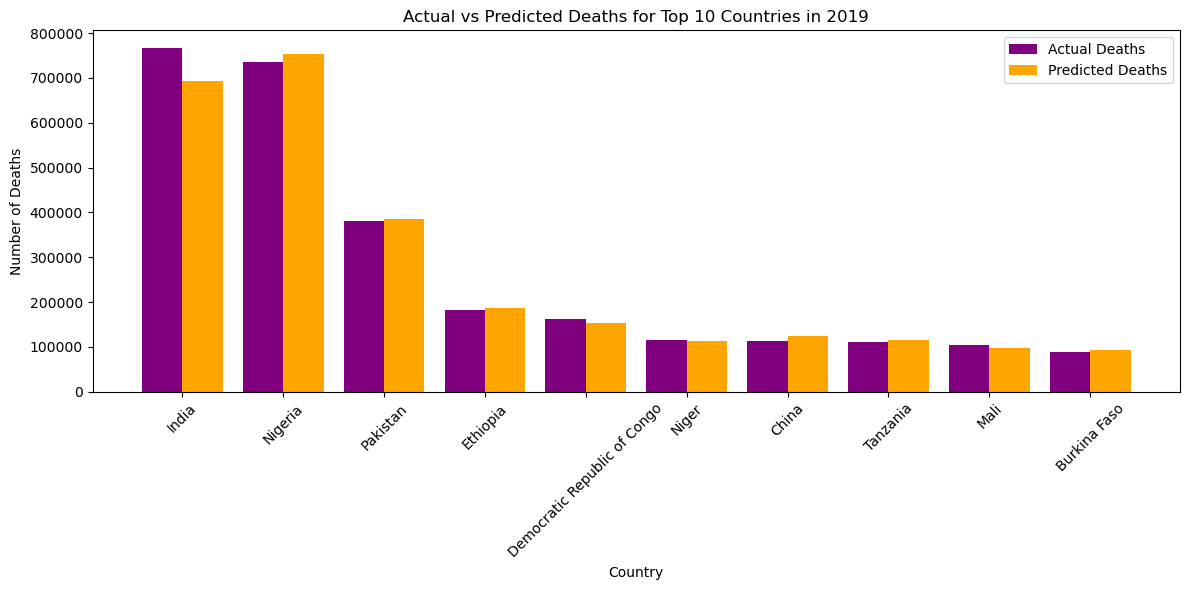

In [41]:
# Actual Numbers Vs Predicted Numbers
top_10_countries = df_country_totals.nlargest(10, 'Actual_Deaths_2019')

index = np.arange(len(top_10_countries['Entity']))

bar_width = 0.4  

plt.figure(figsize=(12, 6))
plt.bar(index, top_10_countries['Actual_Deaths_2019'], width=bar_width, color='purple', label='Actual Deaths')
plt.bar(index + bar_width, top_10_countries['Predicted_Deaths_2019'], width=bar_width, color='orange', label='Predicted Deaths')

plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Actual vs Predicted Deaths for Top 10 Countries in 2019')
plt.xticks(index + bar_width / 2, top_10_countries['Entity'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Decision Tree Regressor Model

In [42]:
# Model Fitting
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train_scaled, y_train)

best_dt_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_dt_tuned = best_dt_model.predict(X_test_scaled)

# Model Evaluation

mse_dt = mean_squared_error(y_test, y_pred_dt_tuned)
mae_dt = mean_absolute_error(y_test, y_pred_dt_tuned)
r2_dt = r2_score(y_test, y_pred_dt_tuned)

print("Best parameters found:", best_params)
print("Mean Squared Error (MSE) for Decision Tree:", mse_dt)
print("Mean Absolute Error (MAE) for Decision Tree:", mae_dt)
print("R-squared for Decision Tree:", r2_dt)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE) for Decision Tree: 1668201.5326730837
Mean Absolute Error (MAE) for Decision Tree: 191.10441659045765
R-squared for Decision Tree: 0.8928360280722066


In [43]:
# Prection of Each Causes for 2019
df_2019_dt = df[df['Year'] == 2019]

X_2019_dt = df_2019_dt[['GDP (constant 2015 US$) Billion', 'INTS', 'Violence', 'Nutrition', 'Hepatitis', 'Neoplasms',
                        'Measles', 'Digestive', 'Cirrhosis', 'Kidney', 'Cardiovascular', 'Congenital', 'Respiratory',
                        'Preterm', 'Heat_Cold', 'Sepsis', 'Nature', 'Diabetes', 'Encephalopathy', 'Meningitis',
                        'Other_Neonatal', 'Whooping_Cough', 'Diarrheal', 'Fire_Heat', 'Road', 'Tuberculosis', 'HIV_AIDS',
                        'Drowning', 'Malaria', 'Syphilis']]

X_2019_gdp = X_2019_dt.drop('GDP (constant 2015 US$) Billion', axis=1)

X_2019_scaled_dt = scaler.transform(X_2019_gdp)
predictions_2019_dt = best_dt_model.predict(X_2019_scaled_dt)

for i, disease in enumerate(X_2019_gdp.columns):
    df_2019_dt[disease + '_Predicted_Deaths_2019_DT'] = predictions_2019_dt[:, i]

df_2019_dt


,Entity,Code,Year,GDP (constant 2015 US$) Billion,INTS,Violence,Nutrition,Hepatitis,Neoplasms,Measles,...,Other_Neonatal_Predicted_Deaths_2019_DT,Whooping_Cough_Predicted_Deaths_2019_DT,Diarrheal_Predicted_Deaths_2019_DT,Fire_Heat_Predicted_Deaths_2019_DT,Road_Predicted_Deaths_2019_DT,Tuberculosis_Predicted_Deaths_2019_DT,HIV_AIDS_Predicted_Deaths_2019_DT,Drowning_Predicted_Deaths_2019_DT,Malaria_Predicted_Deaths_2019_DT,Syphilis_Predicted_Deaths_2019_DT
29,Afghanistan,AFG,2019,21.118474,174,240,925,307,620,1061,...,11525.444444,3387.000000,5988.333333,122.333333,686.111111,499.555556,55.777778,642.666667,54.666667,316.666667
89,Albania,ALB,2019,12.967696,0,1,2,0,18,1,...,36.170029,1.495677,4.351585,2.968300,7.899135,0.406340,0.789625,5.334294,0.046110,0.982709
119,Algeria,DZA,2019,177.355540,8,9,27,10,125,75,...,1931.666667,229.666667,254.666667,61.666667,463.333333,11.666667,20.666667,93.000000,0.000000,77.333333
149,American Samoa,ASM,2019,0.628818,0,0,0,0,0,0,...,2.198333,0.603333,0.813333,0.088333,0.180000,0.038333,0.248333,0.348333,0.000000,0.895000
179,Andorra,AND,2019,3.008968,0,0,0,0,0,0,...,2.198333,0.603333,0.813333,0.088333,0.180000,0.038333,0.248333,0.348333,0.000000,0.895000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,Vanuatu,VUT,2019,0.864199,0,0,4,0,2,4,...,11.175781,2.031250,7.046875,1.097656,2.117188,0.425781,0.492188,2.296875,2.800781,1.593750
6539,Vietnam,VNM,2019,314.947630,21,18,46,4,270,177,...,454.333333,672.000000,138.000000,58.333333,174.666667,98.000000,6.333333,1074.666667,2.333333,216.333333
6779,Yemen,YEM,2019,43.374423,56,35,542,53,248,366,...,6707.000000,998.666667,5842.000000,159.000000,1242.666667,70.666667,80.333333,241.666667,66.333333,397.333333
6809,Zambia,ZMB,2019,24.089862,45,71,986,14,399,137,...,3451.600000,902.600000,6161.400000,140.000000,280.200000,609.300000,2213.000000,194.100000,1630.000000,1937.500000


In [44]:
# Comparision of Predicted Values and Actual Values
df_2019['Actual_Deaths_2019'] = df_2019[df_2019['Year'] == 2019][['INTS', 'Violence', 'Nutrition', 'Hepatitis', 'Neoplasms',
                                                                   'Measles', 'Digestive', 'Cirrhosis', 'Kidney', 'Cardiovascular',
                                                                   'Congenital', 'Respiratory', 'Preterm', 'Heat_Cold', 'Sepsis', 'Nature',
                                                                   'Diabetes', 'Encephalopathy', 'Meningitis', 'Other_Neonatal', 'Whooping_Cough',
                                                                   'Diarrheal', 'Fire_Heat', 'Road', 'Tuberculosis', 'HIV_AIDS', 'Drowning',
                                                                   'Malaria', 'Syphilis']].sum(axis=1)

df_country_totals = df_2019.groupby('Entity')['Actual_Deaths_2019'].sum().reset_index()

df_country_totals['Predicted_Deaths_2019'] = predictions_2019_dt.round().sum(axis=1)

df_country_totals = df_country_totals.merge(df_2019[['Entity', 'GDP_Class']], on='Entity')

df_country_totals = df_country_totals[['Entity', 'Predicted_Deaths_2019', 'Actual_Deaths_2019', 'GDP_Class']]

df_country_totals


,Entity,Predicted_Deaths_2019,Actual_Deaths_2019,GDP_Class
0,Afghanistan,79187.0,68608,2
1,Albania,369.0,399,3
2,Algeria,17604.0,16401,1
3,American Samoa,26.0,7,4
4,Andorra,26.0,0,4
...,...,...,...,...
194,Vanuatu,140.0,177,4
195,Vietnam,17000.0,15340,1
196,Yemen,42213.0,40669,2
197,Zambia,40736.0,30295,2


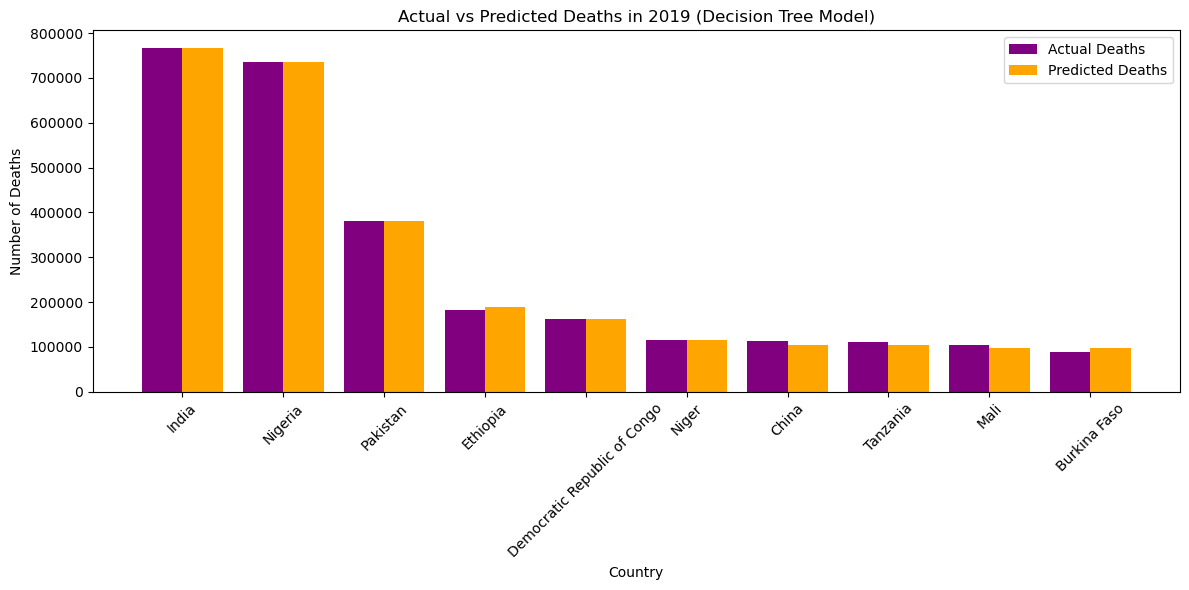

In [45]:
# Comparision Graph
top_10_countries_dt = df_country_totals.nlargest(10, 'Actual_Deaths_2019')
index = np.arange(len(top_10_countries_dt['Entity']))
bar_width = 0.4  

plt.figure(figsize=(12, 6))
plt.bar(index, top_10_countries_dt['Actual_Deaths_2019'], width=bar_width, color='purple', label='Actual Deaths')
plt.bar(index + bar_width, top_10_countries_dt['Predicted_Deaths_2019'], width=bar_width, color='orange', label='Predicted Deaths')

plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Actual vs Predicted Deaths in 2019 (Decision Tree Model)')
plt.xticks(index + bar_width / 2, top_10_countries_dt['Entity'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
# Consolidated Results of All the Classifcation Model
results = [
    {
        "Model": "Random Forest",
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Error": train_error,
        "Test Error": test_error
    },
    {
        "Model": "Decision Tree Bagging",
        "Train Accuracy": train_accuracy_bagging_dt,
        "Test Accuracy": test_accuracy_bagging_dt,
        "Train Error": train_error_bagging_dt,
        "Test Error": test_error_bagging_dt
    },
    {
        "Model": "Gradient Boosting",
        "Train Accuracy": train_accuracy_boosting,
        "Test Accuracy": test_accuracy_boosting,
        "Train Error": train_error_boosting,
        "Test Error": test_error_boosting
    }
]

classification_results = pd.DataFrame(results)
print("Classification Results:")
print(tabulate(classification_results, headers='keys', tablefmt='pretty', showindex=False))



Classification Results:
+-----------------------+--------------------+--------------------+-----------------------+----------------------+
|         Model         |   Train Accuracy   |   Test Accuracy    |      Train Error      |      Test Error      |
+-----------------------+--------------------+--------------------+-----------------------+----------------------+
|     Random Forest     | 0.9964106245513281 | 0.966499162479062  | 0.003589375448671883  | 0.03350083752093802  |
| Decision Tree Bagging | 0.9966499162479062 | 0.9581239530988275 |  0.00335008375209378  | 0.041876046901172526 |
|   Gradient Boosting   | 0.9968892079444843 | 0.9642657733109995 | 0.0031107920555156765 |  0.0357342266890005  |
+-----------------------+--------------------+--------------------+-----------------------+----------------------+


In [47]:
# Consolidated Results for Regression Models
results_regression = [
    {
        "Model": "Random Forest",
        "R2 Score": r2,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae
    },
    {
        "Model": "Decision Tree",
        "R2 Score": r2_dt,
        "Mean Squared Error": mse_dt,
        "Mean Absolute Error": mae_dt
    },
    
]

regression_results = pd.DataFrame(results_regression)
print("Regression Results:")
print(tabulate(regression_results, headers='keys', tablefmt='pretty', showindex=False))


Regression Results:
+---------------+--------------------+--------------------+---------------------+
|     Model     |      R2 Score      | Mean Squared Error | Mean Absolute Error |
+---------------+--------------------+--------------------+---------------------+
| Random Forest | 0.9432340032741553 | 525904.2801559122  |  138.2279608017326  |
| Decision Tree | 0.8928360280722066 | 1668201.5326730837 | 191.10441659045765  |
+---------------+--------------------+--------------------+---------------------+
